# Visualización con Seaborn

Matplotlib ha demostrado ser una herramienta de visualización increíblemente útil y popular, pero incluso los usuarios ávidos admitirán que a menudo deja mucho que desear.
Hay varias quejas válidas sobre Matplotlib que a menudo surgen:
- Antes de la versión 2.0, los valores predeterminados de Matplotlib no son exactamente las mejores opciones. Se basó en MATLAB alrededor de 1999, y esto se nota a menudo.
- La API de Matplotlib tiene un nivel relativamente bajo. Es posible hacer una visualización estadística sofisticada, pero a menudo requiere una *mucha* de código repetitivo.
- Matplotlib es anterior a Pandas en más de una década y, por lo tanto, no está diseñado para usarse con Pandas ``DataFrame``s. Para visualizar datos de un ``DataFrame`` de Pandas, debe extraer cada ``Serie`` y, a menudo, concatenarlas juntas en el formato correcto. Sería mejor tener una biblioteca de gráficos que pueda usar inteligentemente las etiquetas ``DataFrame`` en un gráfico.
Una respuesta a estos problemas es [Seaborn](http://seaborn.pydata.org/). Seaborn proporciona una API además de Matplotlib que ofrece opciones sensatas para el estilo de trazado y los valores predeterminados de color, define funciones simples de alto nivel para tipos de trazados estadísticos comunes y se integra con la funcionalidad proporcionada por Pandas ``DataFrame``s.
Para ser justos, el equipo de Matplotlib está abordando esto: recientemente agregó las herramientas ``plt.style`` discutidas en [Personalización de Matplotlib: Configuraciones y hojas de estilo](04.11-Configuraciones-y-hojas-de-estilo.ipynb), y está comenzando a manejar los datos de Pandas de manera más fluida.
La versión 2.0 de la biblioteca incluirá una nueva hoja de estilo predeterminada que mejorará el status quo actual.
Pero por todas las razones que acabamos de discutir, Seaborn sigue siendo un complemento extremadamente útil.

## Seaborn contra Matplotlib
Este es un ejemplo de un diagrama de recorrido aleatorio simple en Matplotlib, utilizando su formato y colores de diagrama clásicos.
Empezamos con las típicas importaciones:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Ahora creamos algunos datos de caminata aleatoria:

In [ ]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

Y hacer una trama simple:

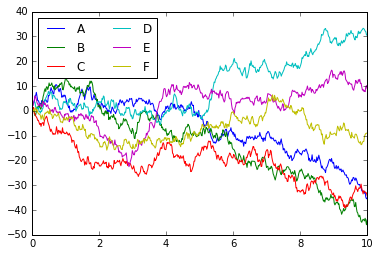

In [ ]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Aunque el resultado contiene toda la información que nos gustaría que transmitiera, lo hace de una manera que no es del todo agradable estéticamente e incluso parece un poco anticuado en el contexto de la visualización de datos del siglo XXI.
Ahora echemos un vistazo a cómo funciona con Seaborn.
Como veremos, Seaborn tiene muchas de sus propias rutinas de trazado de alto nivel, pero también puede sobrescribir los parámetros predeterminados de Matplotlib y, a su vez, obtener scripts de Matplotlib incluso simples para producir resultados muy superiores.
Podemos configurar el estilo llamando al método ``set()`` de Seaborn.
Por convención, Seaborn se importa como ``sns``:

In [ ]:
import seaborn as sns
sns.set()

Ahora volvamos a ejecutar las mismas dos líneas que antes:

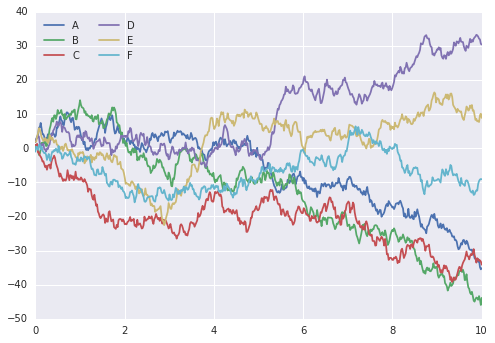

In [ ]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

¡Ay, mucho mejor!

## Explorando parcelas marinas
La idea principal de Seaborn es que proporciona comandos de alto nivel para crear una variedad de tipos de gráficos útiles para la exploración de datos estadísticos e incluso algunos ajustes de modelos estadísticos.
Echemos un vistazo a algunos de los conjuntos de datos y tipos de gráficos disponibles en Seaborn. Tenga en cuenta que todo lo siguiente *podría* hacerse usando comandos sin procesar de Matplotlib (esto es, de hecho, lo que Seaborn hace bajo el capó), pero la API de Seaborn es mucho más conveniente.

### Histogramas, KDE y densidades
A menudo, en la visualización de datos estadísticos, todo lo que desea es trazar histogramas y distribuciones conjuntas de variables.
Hemos visto que esto es relativamente sencillo en Matplotlib:

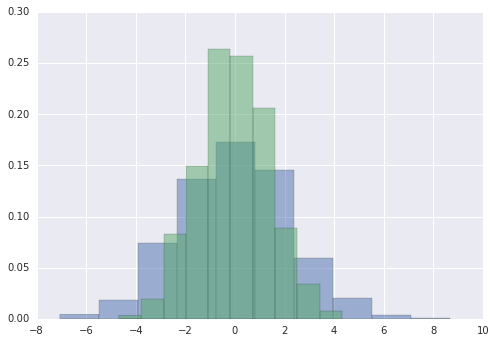

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

En lugar de un histograma, podemos obtener una estimación fluida de la distribución mediante una estimación de la densidad del núcleo, lo que hace Seaborn con ``sns.kdeplot``:

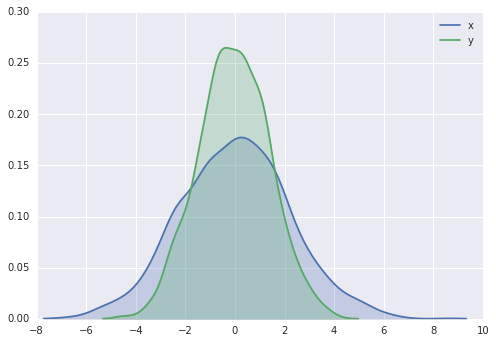

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Los histogramas y KDE se pueden combinar usando ``distplot``:

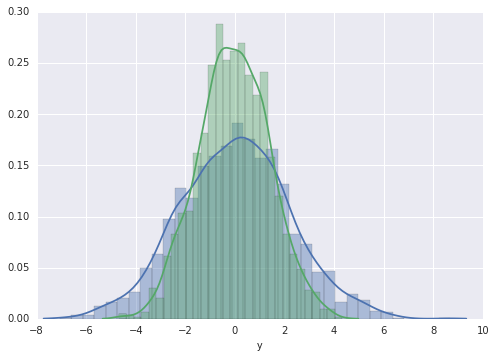

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

Si pasamos el conjunto de datos bidimensional completo a ``kdeplot``, obtendremos una visualización bidimensional de los datos:

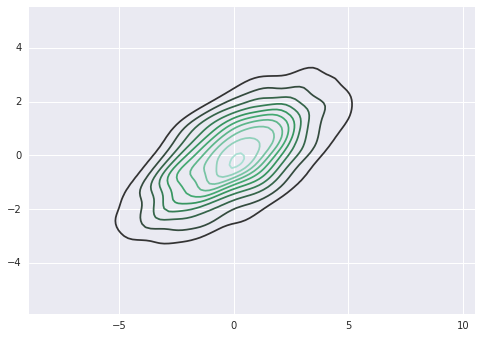

In [ ]:
sns.kdeplot(data);

Podemos ver la distribución conjunta y las distribuciones marginales juntas usando ``sns.jointplot``.
Para este gráfico, estableceremos el estilo en un fondo blanco:

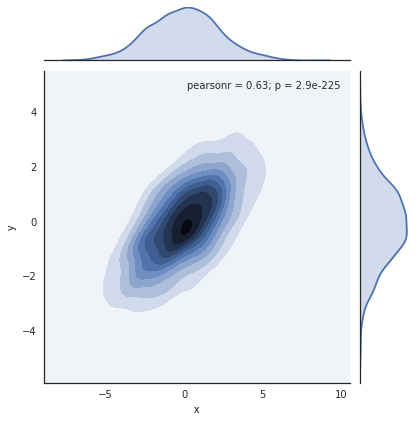

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

Hay otros parámetros que se pueden pasar a ``jointplot``—por ejemplo, podemos usar un histograma hexagonal en su lugar:

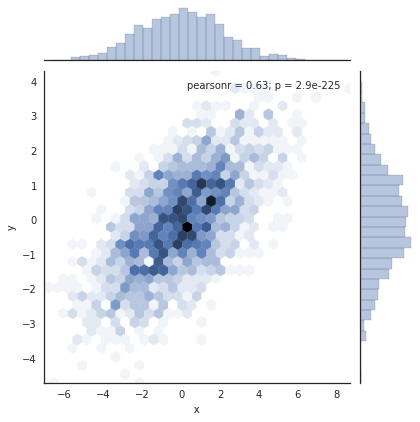

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Parcelas
Cuando generaliza gráficos conjuntos a conjuntos de datos de dimensiones más grandes, termina con *gráficos de pares*. Esto es muy útil para explorar correlaciones entre datos multidimensionales, cuando desea trazar todos los pares de valores entre sí.
Haremos una demostración de esto con el conocido conjunto de datos Iris, que enumera las medidas de los pétalos y sépalos de tres especies de iris:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Visualizar las relaciones multidimensionales entre las muestras es tan fácil como llamar a ``sns.pairplot``:

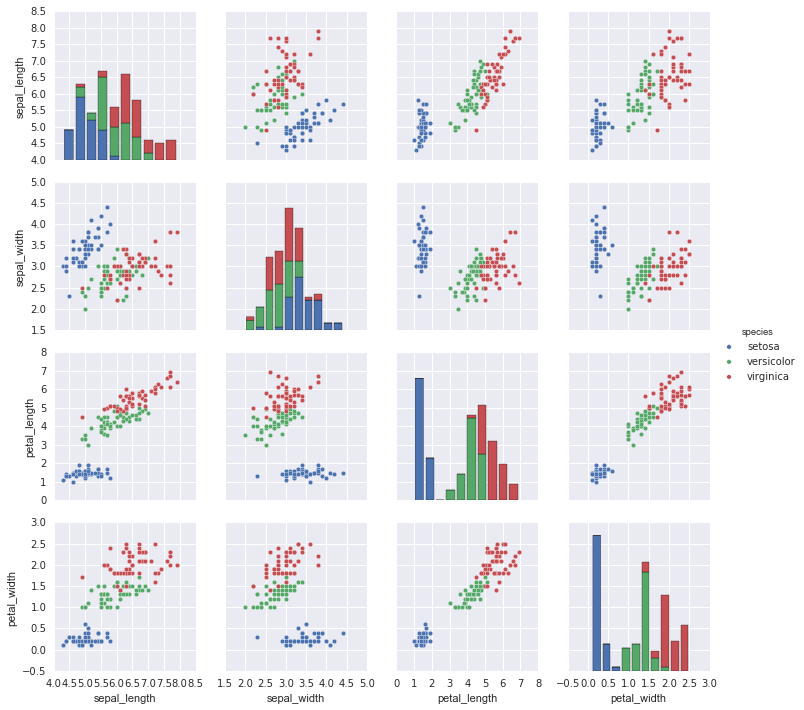

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

### Histogramas facetados
A veces, la mejor manera de ver los datos es a través de histogramas de subconjuntos. ``FacetGrid`` de Seaborn hace que esto sea extremadamente simple.
Echaremos un vistazo a algunos datos que muestran la cantidad que el personal del restaurante recibe en propinas en función de varios datos de indicadores:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

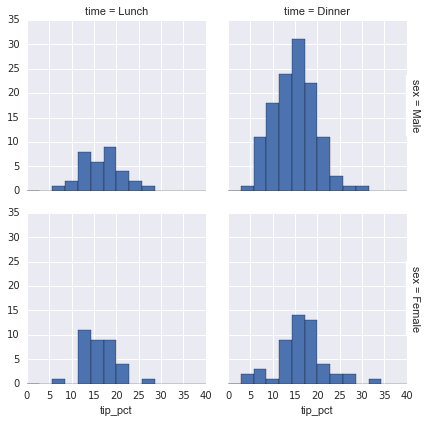

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Gráficas de factores
Los diagramas de factores también pueden ser útiles para este tipo de visualización. Esto le permite ver la distribución de un parámetro dentro de los contenedores definidos por cualquier otro parámetro:

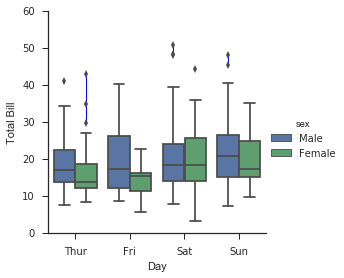

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Distribuciones conjuntas
Similar al gráfico de pares que vimos anteriormente, podemos usar ``sns.jointplot`` para mostrar la distribución conjunta entre diferentes conjuntos de datos, junto con las distribuciones marginales asociadas:

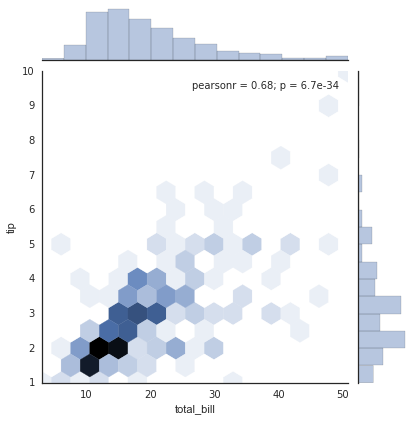

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

El gráfico conjunto puede incluso hacer una estimación y regresión automática de la densidad del kernel:

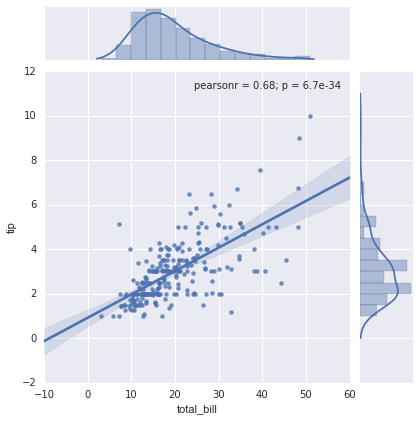

In [ ]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### Gráficas de barras
Las series de tiempo se pueden graficar usando ``sns.factorplot``. En el siguiente ejemplo, usaremos los datos de los planetas que vimos por primera vez en [Agregación y agrupación](03.08-Agregació-y-agrupación.ipynb):

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

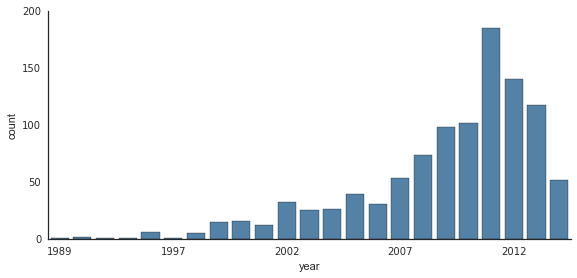

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

Podemos aprender más mirando el *método* de descubrimiento de cada uno de estos planetas:

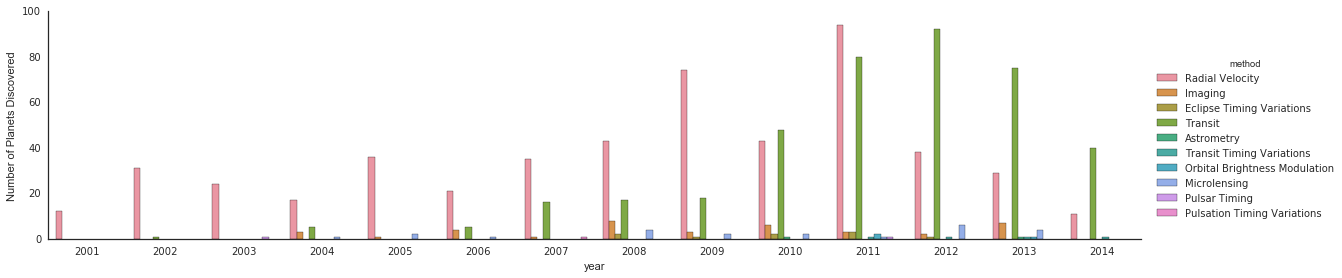

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

Para obtener más información sobre el trazado con Seaborn, consulte [documentación Seaborn](http://seaborn.pydata.org/), un [tutorial] (http://seaborn.pydata.org/
tutorial.htm), y la [galeria Seaborn](http://seaborn.pydata.org/examples/index.html).

## Ejemplo: Exploración de tiempos de finalización de maratón
Aquí veremos el uso de Seaborn para ayudar a visualizar y comprender los resultados finales de un maratón.
Extraje los datos de fuentes en la Web, los agregué y eliminé cualquier información de identificación, y los puse en GitHub, donde se pueden descargar.
(si está interesado en usar Python para web scraping, recomendaría [*Web Scraping con Python*](http://shop.oreilly.com/product/0636920034391.do) de Ryan Mitchell).
Comenzaremos descargando los datos de
la Web, y cargándolo en Pandas:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

age gender     split     final
0   33      M  01:05:38  02:08:51
1   32      M  01:06:26  02:09:28
2   31      M  01:06:49  02:10:42
3   38      M  01:06:16  02:13:45
4   31      M  01:06:32  02:13:59

Por defecto, Pandas cargó las columnas de tiempo como cadenas de Python (escriba ``objeto``); podemos ver esto mirando el atributo ``dtypes`` del DataFrame:

In [ ]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

Arreglemos esto proporcionando un convertidor para los tiempos:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

age gender    split    final
0   33      M 01:05:38 02:08:51
1   32      M 01:06:26 02:09:28
2   31      M 01:06:49 02:10:42
3   38      M 01:06:16 02:13:45
4   31      M 01:06:32 02:13:59

In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

Eso se ve mucho mejor. Para el propósito de nuestras utilidades de trazado Seaborn, a continuación agreguemos columnas que proporcionen los tiempos en segundos:

In [ ]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

age gender    split    final  split_sec  final_sec
0   33      M 01:05:38 02:08:51     3938.0     7731.0
1   32      M 01:06:26 02:09:28     3986.0     7768.0
2   31      M 01:06:49 02:10:42     4009.0     7842.0
3   38      M 01:06:16 02:13:45     3976.0     8025.0
4   31      M 01:06:32 02:13:59     3992.0     8039.0

Para tener una idea de cómo se ven los datos, podemos trazar un ``gráfico conjunto`` sobre los datos:

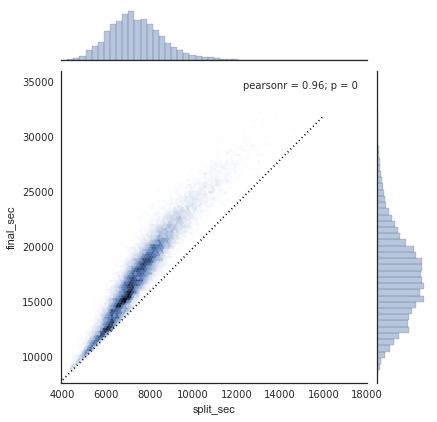

In [ ]:
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

La línea punteada muestra dónde estaría el tiempo de alguien si corriera el maratón a un ritmo perfectamente constante. El hecho de que la distribución se encuentre por encima de esto indica (como era de esperar) que la mayoría de las personas reducen la velocidad en el transcurso del maratón.
Si ha corrido de manera competitiva, sabrá que aquellos que hacen lo contrario (correr más rápido durante la segunda mitad de la carrera) se dice que tienen una "división negativa" de la carrera.
Vamos a crear otra columna en los datos, la fracción dividida, que mide el grado en que cada corredor divide negativamente o positivamente la carrera:

In [ ]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

age gender    split    final  split_sec  final_sec  split_frac
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842

Cuando esta diferencia dividida es menor que cero, la persona divide negativamente la carrera por esa fracción.
Hagamos un gráfico de distribución de esta fracción dividida:

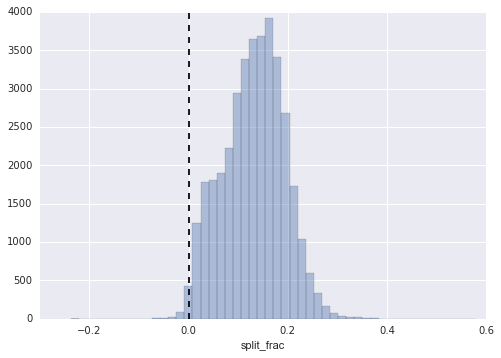

In [ ]:
sns.distplot(data['split_frac'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
sum(data.split_frac < 0)

251

De casi 40.000 participantes, solo 250 personas dividieron negativamente su maratón.
Veamos si existe alguna correlación entre esta fracción dividida y otras variables. Haremos esto usando un ``pairgrid``, que dibuja gráficos de todas estas correlaciones:

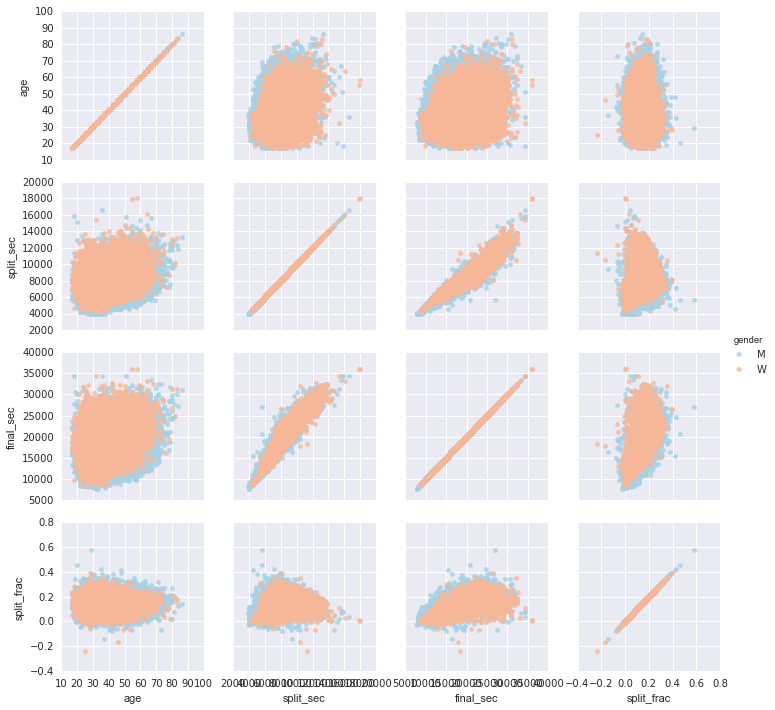

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Parece que la fracción dividida no se correlaciona particularmente con la edad, pero sí con el tiempo final: los corredores más rápidos tienden a tener divisiones más cercanas a la par en su tiempo de maratón.
(Vemos aquí que Seaborn no es una panacea para los males de Matplotlib cuando se trata de estilos de trazado: en particular, las etiquetas del eje x se superponen. Debido a que la salida es un gráfico simple de Matplotlib, sin embargo, los métodos en [Personalización de Ticks](04.10-Personalización-de-Ticks.ipynb) se pueden usar para ajustar tales cosas si lo desea.)
La diferencia entre hombres y mujeres aquí es interesante. Veamos el histograma de fracciones divididas para estos dos grupos:

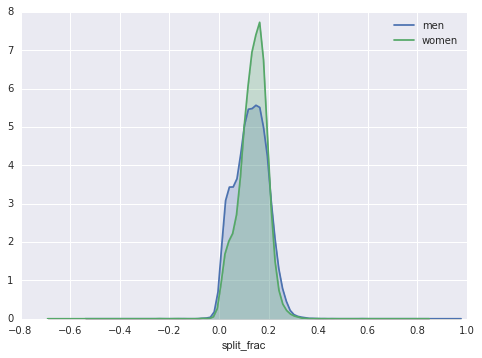

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

¡Lo interesante aquí es que hay muchos más hombres que mujeres que se acercan a una división pareja!
Esto casi parece una especie de distribución bimodal entre hombres y mujeres. Veamos si podemos averiguar qué está pasando mirando las distribuciones en función de la edad.
Una buena manera de comparar distribuciones es usar un *diagrama de violín*

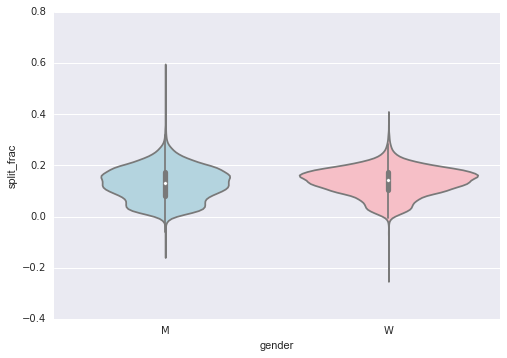

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

Esta es otra forma de comparar las distribuciones entre hombres y mujeres.
Profundicemos un poco más y comparemos estas tramas de violín en función de la edad. Comenzaremos creando una nueva columna en la matriz que especifique la década de edad en la que se encuentra cada persona:

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

age gender    split    final  split_sec  final_sec  split_frac  age_dec
0   33      M 01:05:38 02:08:51     3938.0     7731.0   -0.018756       30
1   32      M 01:06:26 02:09:28     3986.0     7768.0   -0.026262       30
2   31      M 01:06:49 02:10:42     4009.0     7842.0   -0.022443       30
3   38      M 01:06:16 02:13:45     3976.0     8025.0    0.009097       30
4   31      M 01:06:32 02:13:59     3992.0     8039.0    0.006842       30

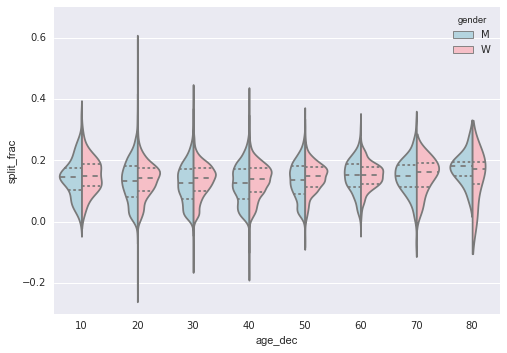

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

Al observar esto, podemos ver dónde difieren las distribuciones de hombres y mujeres: las distribuciones divididas de hombres de 20 a 50 años muestran una sobredensidad pronunciada hacia divisiones más bajas en comparación con las mujeres de la misma edad (o de cualquier edad, por ejemplo). ese asunto).
También sorprendentemente, las mujeres de 80 años parecen superar a *todos* en términos de tiempo parcial. Esto probablemente se deba al hecho de que estamos estimando la distribución a partir de números pequeños, ya que solo hay un puñado de corredores en ese rango:

In [ ]:
(data.age > 80).sum()

7

Volviendo a los hombres con divisiones negativas: ¿quiénes son estos corredores? ¿Esta fracción dividida se correlaciona con terminar rápidamente? Podemos trazar esto muy fácilmente. Usaremos ``regplot``, que ajustará automáticamente una regresión lineal a los datos:

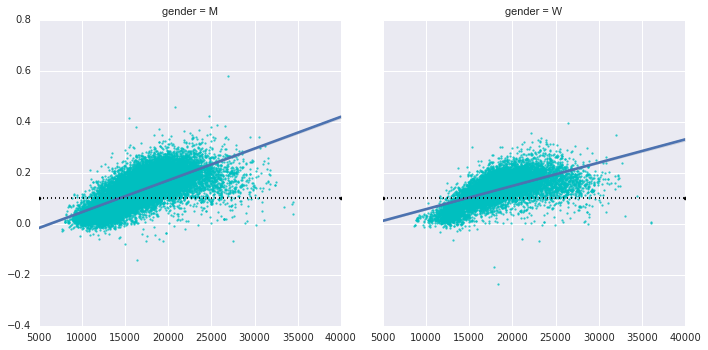

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

Aparentemente, las personas con splits rápidos son los corredores de élite que terminan en ~15 000 segundos, o alrededor de 4 horas. Las personas más lentas que eso tienen muchas menos probabilidades de tener una segunda división rápida.